# "Cellular Automata and Iterative Algorithms"
> "In this blog post we will look at cellular automata and iterative computation. We shall look at how simple deterministic rules can lead to surprising results. We will start by studying 1d cellular automata before moving on to 2d. We will then look at some example models: Conway's game of life, the termite-woodchip model and the Schelling segregation model."
- toc: true
- author: Lewis Cole (2020)
- branch: master
- badges: false
- comments: false
- categories: [Cellular-Automata, Emergence, Iterative-Computation, Game-of-Life, Agent-Based-Model, Schelling-Model]
- hide: false
- search_exclude: false
- image: https://github.com/lewiscoleblog/blog/raw/master/images/Cellular-Automata/Rule30.png

In [1]:
#hide
import warnings
warnings.filterwarnings('ignore')

Cellular automata, despite the gradiose name, are very simple rule-based programs. Essentially we have a number of cells that can take various states, through time the cell's state will update according to some simple rule. We will begin with the simplest case.

## 1D Cellular Automata
We start by looking at 1-dimensional cellular automata (elementary cellular automata). We imagine this consisting of a "line" of cells lined up 1 next to the other. Each cell can take values $0$ or $1$ (at least initially). The cells update their value in time based on a set of rules based on the previous value the cell has taken and the previous values taken by its two adjacent neighbours (left and right). At each step all cells update in unison (synchronous updates - to avoid any "cascading" type effects).

If we colour code the cells such that $0$ is equivalent to white and $1$ is equivalent to black we could describe update rules in tabular form:

![](https://github.com/lewiscoleblog/blog/raw/master/images/Cellular-Automata/Rules.png)

For example the top entry in the table gives the sub-rule that if the left neighbour is white, the cell is white and the right neighbour is white then the cells value in the next timestep is white. The second entry states that if the left neighbour and previous cell is white while the right neighbour is black then the cell updates to black. And so on for all the other entries in the table. There are 8 sub-rules total to describe this automata since each cell can take only 2 values and $2^3 = 8$. The collection of 8 sub-rules constitutes a rule. For convenience I refer to the "input" to the cell by a binary value (left most cell representing $4$, above $2$ and right $1$ in a binary representation). So a binary input of $001$ means the output of the update step will be $1$ (black) - the second row in the table. To classify the rules we also use binary, the right most column in the table shows how to do this, in this case the rule shown is rule $30$ ($2+4+8+16=30$). 

That is all there is to it. On the face of it this does not seem very interesting but it turns out that cellular automata are deceptively complex even in this simple 1d form. To see this let's look at how rule 30 behaves, starting with a single black cell.

We will make a 1d cellular automata function to help us plot the automata. The state of the cells will evolve "downwards" on the plot, so the first row will represent the initial condition and the second will represent the state after one update, and so on. We will then call the function to generate images of the rules we wish to examine. For convenience we wil assume any "cells" outside of the frame are set to a $0$ state (white) - we could just as easily take a periodic boundary condition so that the left most cell is connected to the right most cell. In taking the $0$ assumption we can introduce "edge effects" for some rules, however this is fine for our purpose.

The function can be seen below:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fix Random seed
np.random.seed(123)

def CA_1D(N, rules, initial):
    # Initialize array
    image = np.zeros((N+1, 2*N+1))
    image[0, :] =  initial
    
    # Loop over total time steps
    for i in range(1,N+1):
        # Loop over cells per time step
        for j in range(2*N + 1):
            # if cell 0 set left neighbour to 0
            if j == 0:
                left = 0
            else:
                left = image[i-1, j-1]
                
            above = image[i-1,j]
            
            # If cell 2N+1 set right neigbour to 0
            if j == 2*N:
                right = 0
            else:
                right = image[i-1, j+1]

            # Convert to binary
            binary = right + 2*above + 4*left

            # Update cell
            image[i,j] = rules[7 - int(binary)]
    
    # Plot image of automata
    plt.figure(figsize=(10,15), frameon=False)
    plt.imshow(image, cmap='binary')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

We can now use this to plot rule 30, we will start with a single black cell in a row and evolve from there:

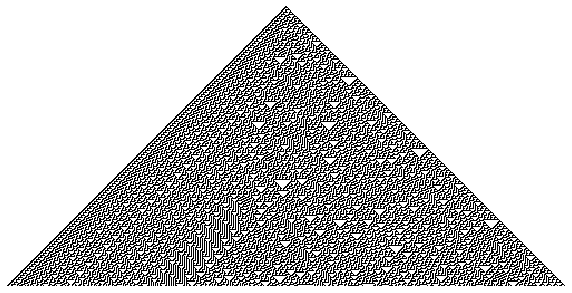

In [3]:
# Rule 30

N = 250
rules = np.array([0,0,0,1,1,1,1,0])
initial = np.zeros(2*N+1)
initial[N] = 1

CA_1D(N, rules, initial)

This is somewhat counter to our intuition, we would not expect a simple set of rules to be able to generate such complicated, seemingly random behaviour. Instead we would expect something much more "regular" and "predictable". 

From our construction we know that there are "only" $256$ rules ($2^8$) so in this case it is possible to iterate through them all. Stephen Wolfram did this in the 1980s and observed 4 distinct classes of behaviour:

* **Class 1** - The automata quickly converges to a stable state and does not change
* **Class 2** - The automata quickly converges to a regular repetitive pattern
* **Class 3** - The automata quickly converges to a seemingly random or chaotic pattern (rule 30 is one such example)
* **Class 4** - The automata quickly converges to a number of distinct patterns that "interact" with each other in unpredictable ways

We would have likely expected to observe class 1 and class 2 behaviour for all rules, the 3rd and 4th classes are interesting - they are not merely "anamolies" there are reasonably large numbers of rules in each class. These classes are some of the simplest examples of emergent behaviour - from seemingly simple rules comes complex global behaviours that look like they are specifically engineered. Stephen Wolfram landed on the phrase "A New Kind of Science" (and wrote a book under the same name) to represent this approach. Whereas in the past to engineer a solution we would have looked at large scale properties and try to "construct" a solution. The "emergence" approach suggests instead that we can find a "universe" of possible global behaviours generated by simple rules and then select the best (or at least a suitable) one. This very much mimics the evolutionary process. 

As of 2020 the team at Wolfram have embarked on framing the physics problem of a "theory of everything" in terms of elementary computation (in some sense a generalization of the cellular automata presented here). They suggest exploring the space of fundamental computations in hope of finding rules that are able to generate all our physical laws (e.g. the strong and weak nuclear forces, general relativity, quantum theory etc). You can read more about this at: https://www.wolframphysics.org/

Despite the apparent simplicity there are still many unanswered theoretical questions about 1d automata. Wolfram have offered a \$30k prize for solving any one of the following open problems in relation to rule 30 as shown above:
1. Does the centre column remain non-periodic? (i.e. no repeating patterns)
2. Does the centre column (on average) contain equally many black and white cells?
3. Does computation of the Nth cell in the centre column require at least $O(N)$ effort?

Point 3 above alludes to the concept of computational irreducibility. If the computation requires at least $O(N)$ effort then (essentially) the cellular automata rule-based procedure is the "most efficient" way to compute these sequences and it is not possible to find a "shortcut" that allows you to predict what the result of some rule set more quickly.

If the centre column (or other rules) are capable of producing non-periodic random numbers this has quite a profound impact on the nature of randomness. What we percieve as randomness in the real world could infact be a deterministic process, moreover the rules generating it could be remarkably simple! From a more practical standpoint it could pave the way for better pseudo-random number generators for our stochastic models, cryptography and so on.

We will now look at examples from each of the 4 rule classes. For each one we will start with a random initial condition.

Class 1 (e.g. rule 160):

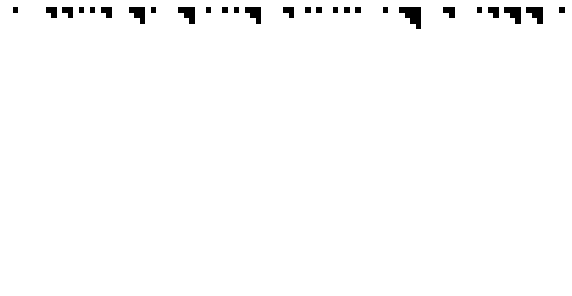

In [4]:
# Rule 160
# Class 1 Behaviour
# Converges to stable state

N = 50
rules = np.array([1,1,0,0,0,0,0,0])
initial = np.random.randint(low=0, high=2, size=2*N+1)

CA_1D(N, rules,initial)

Class 2 (e.g. rule 3):

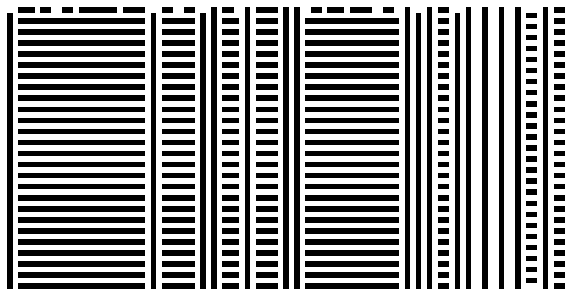

In [5]:
# Rule 3
# Class 2 Behaviour
# Periodic behaviour

N = 50
rules = np.array([0,0,0,0,0,1,0,1])
initial = np.random.randint(low=0, high=2, size=2*N+1)

CA_1D(N, rules, initial)

Class 3 (e.g. rule 126):

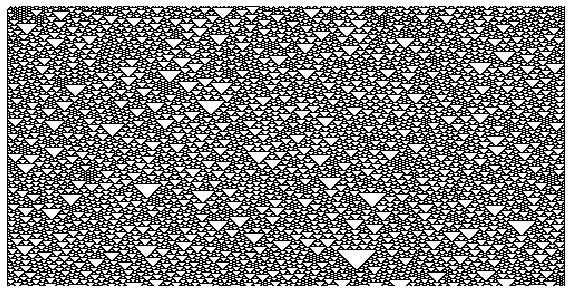

In [6]:
# Rule 126
# Class 3 Behaviour
# Seemingly random behaviour

N = 250
rules = np.array([0,1,1,1,1,1,1,0])
initial = np.random.randint(low=0, high=2, size=2*N+1)

CA_1D(N, rules, initial)

Class 4 (e.g. rule 110):

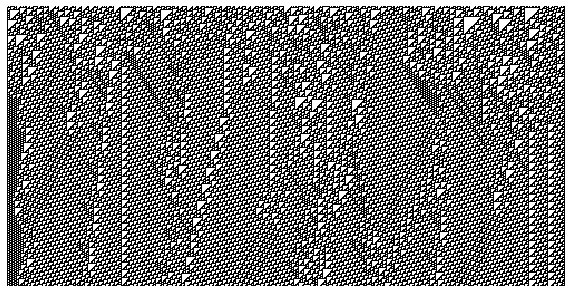

In [7]:
# Rule 110
# Class 4 Behaviour
# Localised repetitive structures that interact with each other

N = 250
rules = np.array([0,1,1,0,1,1,1,0])
initial = np.random.randint(low=0, high=2, size=2*N+1)

CA_1D(N, rules, initial)

## 2d Cellular Automata
While the 1d cellular automata is interesting and easy to investigate and study we may want to extend these ideas. The first natural extension is to consider what happens to automata in 2 spatial dimensions. Unlike before we cannot (easily) plot a 2d automata evolving in time on a single figure moving down the page. We can still visualise however through either the use of animations or simply plotting static figures at certain time steps. 

By expanding to 2 spatial dimensions it also opens up new geometries. In 1 dimension we were limited to the "left, above and right" neighbours. In 2 dimensions there are options; we could imagine a square lattice with 4 neighbours (up, down, left, right) or 8 neighbours (plus the diagonals) or we could imagine a triangular lattice with 6 neighbours, and so on. This opens up a lot of flexibility.

Many/all of the behaviours we observe in 1d also carry over to 2d. For a simple illustration of a 2d automata we will plot a simple "class 2" rule on a triangular lattice. Plotting a triangular lattice requires a little attention since computer arrays appear to "naturally" be square lattices. However it only requires a renaming of the indices to give 6 neighbours:

![](https://github.com/lewiscoleblog/blog/raw/master/images/Cellular-Automata/Triangle.png)

To plot this we will use a scatter plot to more accurately capture the triangular lattice geometry.

We will implement a simple rule, if a cell is "off" and only any 1 neighbour is "on" then it shall flip its state to "on", otherwise it remains unchanged.

The code for this can be seen below:

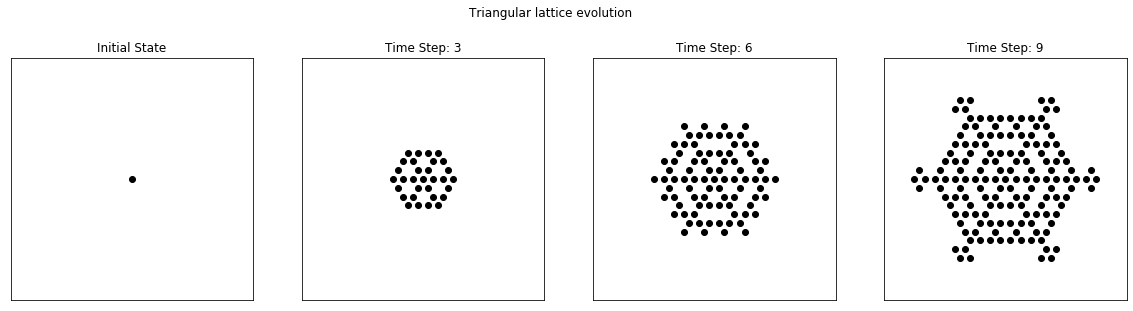

In [8]:
# 2d Cellular Automata on a Triangular Lattice

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fix lattice size and iterations
N = 24
every = 3
num_plots = 3
n_iter = num_plots*every

# Set up a container - initialize with single element
image = np.zeros((N,N))
image[int(N/2), int(N/2)] = 1

# Define neighbours
x_neighbour = np.array([1, 0, 1, -1, 0, -1])
y_neighbour = np.array([-1, -1, 0, 1, 1, 0])

# Set up plot

fig, axs = plt.subplots(1, num_plots+1, figsize=(20, 5))
fig.suptitle('Triangular lattice evolution')
axs[0].set_title('Initial State')

for x in range(num_plots+1):
    axs[x].scatter(N/2, N/2, color='black')
    axs[x].set_xticks([])
    axs[x].set_yticks([])
    axs[x].set_xlim(0,N)
    axs[x].set_ylim(0,N)
    axs[x].set_aspect('equal')
    if x > 0:
        axs[x].set_title("Time Step: %i" %(x*every))

# Set indicator for stopping plots
plot_id = 1

# Loop update
for i in range(1, n_iter+1):
    updated = np.zeros((N,N))
    
    # Loop over lattice    
    for x in range(1, N-1):
        for y in range(1, N-1):
            # Reset cumulative sum
            cumul=0
            
            # Loop over neighbours and store "on" states
            for k in range(x_neighbour.shape[0]):
                cumul += image[x+x_neighbour[k], y+y_neighbour[k]]
            
            # If cell is empty and only 1 neighbour then update and plot
            if image[x,y] == 0 and cumul == 1:
                updated[x,y] = 1
                
                # Loop over remaining plots
                for p in range(plot_id, num_plots+1):
                    axs[p].scatter(y+(x-N/2)/2, N/2 + 0.866*(x-N/2), color='black')
    # Update image
    image += updated
    
    # Update plot identifier
    if i % every == 0:
        plot_id += 1

    # End loop

plt.show()

A we can see this rule generates a "snowflake".

In a similar way to before we can try other rules if we so wish. However we shall not do so here for brevity. We could also try moving from a 2 state automata (cells taking states $0$ or $1$) to a multi-state system, however the number of rules to specify such an automata grows quickly (e.g. for a 4 state system in 1d we would require $4^3 = 64$ sub-rules) and the number of patterns increases rapidly also (e.g. for the same 4 state system in 1d there are over $8.5e37$ rule sets!). However via symmetry we can reduce this space slightly. Moreover we could, as above, define simple rules such as "if over 50% of neighbours are on then on" and so forth.

We now turn our attention to specific applications of cellular automata.

## Game of Life
The Game of Life was developed by Conway in 1970 - before work on other cellular automata had taken place. It is called "the game of life" as it creates patterns that appear as if they are "living" when animated. In the language we have used so far it is a 2-state 2d cellular automata where the update rules are:
1. Any active cell with two or three active neighbours remains active.
2. Any inactive cell with three active neighbours becomes active.
3. All other active cells cells become inactive.
4. All other inactive cells remain inactive.

Again despite it's apparent simplicity the game of life is capable of showing some complex behaviour.

Let's code it up and take a look:

In [1]:
# Conway's Game of Life

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

# Fix random seed (for initialization only)
np.random.seed(123)

# Set Grid size and initialize randomly
N = 100
image = np.random.randint(low=0, high=2, size=(N,N))

###### Main Code ######
# Update function to simulate a single evolution time step
def update():
    # Take copy of previous time step
    old = image.copy()
    
    # Loop over all cells
    for i in range(N):
        for j in range(N):
            
            # Count number of active neighbours with loop
            n_sum = 0
            for x in range(-1,2):
                for y in range(-1,2):
                    idx = (i+x) % N
                    idy = (j+y) % N 
                    n_sum += old[idx,idy]
            # Remove current cell
            n_sum -= old[i,j]
            
            # Apply Conway's rules and update
            if old[i,j] == 1:
                if n_sum == 2 or n_sum == 3:
                    image[i,j] = 1
                else:
                    image[i,j] = 0
            if old[i,j] == 0:
                if n_sum == 3:
                    image[i,j] = 1
                else:
                    image[i,j] = 0
                
###### Animate ######
# Initialize figure
figure = plt.figure()
axes = plt.axes(xlim=(0, N-1), ylim=(0, N-1))
axes.set_xticks([], [])
axes.set_yticks([], [])
viz = plt.imshow(image, cmap="binary")

# Define animation step
def animate(frame):
    update()
    viz.set_array(image)

# Display animation function
def display_animation(anim):
    # Close initialized static plot
    plt.close(anim._fig)
    
    # Returns animation to HTML
    return HTML(anim.to_jshtml())

# Set up FuncAnimation
anim = animation.FuncAnimation(figure, animate, frames=50, interval=150)

# Call the display function
display_animation(anim)

As we can see there appears to be living organisms within our simulation! Somewhat reminiscent of bacteria. Of course there is no such thing as an "organism", they are just "lightbulbs" turning on and off in sequence. This raises a philosophical question of whether this constitutes a "life" of whether it is just a homuncular functionism (in laymans terms: are we seeing life where it does not exist, like how we often "see" animals in clouds or faces within muffins in a coffee shop).

Since the game of life has been studied so thoroughly there are a number of stable behaviours people have discovered including "static objects", "blinkers" that appear to oscilate fixed in space, "gliders" that travel along the screen and "ray guns" that appear to "shoot" bullets across the screen. Some of these have been classified on the wikipedia entry: https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life#Examples_of_patterns We could reproduce some of these behaviours by choosing suitable starting conditions in the code above.

It has also been shown that the game of life is capable of performing computation. So you could add two integers together (for example) using the game of life. Moreover it has been shown that the game of life is Turing complete, this essentially means that (with a large enough automata) it can recreate any code. So, in theory, we could recreate the entire Windows operating system entirely out of the game of life! (Of course this is not an efficient way to do this). This is very surprising that such a (seemingly) simple program is capable of creating such complexity. This clearly have implications for evolution, where emergent behaviour and characteristics could be built out of much simpler fundamental iterative rules. If we could codify these rules we could (in theory) put them in a computer and recover the entire evolutionary history of life on earth.

We could modify Conway's procedure above to test different rule sets to investigate how the "life" changes. We could imagine this akin to different environments in an evolutionary setting. We could also add "noise" to the system, so the rules above are only implemented correctly a certain percentage of the time (e.g. "Any active cell with two or three active neighbours remains active with 80% probability and becomes inactive with 20% probability"). This could be an analogue to mutations in the evolutionary system. We could also investigate "adaptive" rules, whereby the rules change over time (perhaps determinstically or perhaps dependent on the state of the system). Each of these are simple modifications to the base code above.

## Termite and Wood Chips
We now look at a simple model infuenced by cellular automata: the termite and woodchip model. One could argue that this is in fact an agent based model rather than a cellular automata. However the line between cellular automata and agent based model is somewhat fuzzy. 

The model environment is a 2d grid (square lattice) taking states $0$ (empty) or $1$ (containing a "woodchip"). In the environment there are "termites" that wander around according to a random walk. If the termite encounters a woodchip it picks it up (the grid cells state changes from $1$ to $0$). The termite will then carry the woodchip, if it encounters another woodchip while holding one then the termite will drop the woodchip at the next empty cell that it encounters (that cell changing from state $0$ to $1$). This is repeated multiple times.

As this is a dynamic model it helps to visualize with an animation. We shall denote empty cells as "white" and woodchips by "black". Termites will be represented by "red circles" traversing the space.

This is a very simple model. We can see an example implementation below:

In [2]:
# Termite and Wood Chip model

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

# Fix random seed
np.random.seed(123)

###### Model Parameters ######
N = 50             # Grid size
N_m = 100          # Number of termites
Chip_p = 0.3       # Proportion of grids containing wood chips
num_frames = 250   # Number of animated frames

# Initialize
# Grid of woodchips
Grid = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if np.random.random() < Chip_p:
            Grid[i, j] = 1
Initial_Grid = Grid.copy()

# Initial Location of termites
Mites = np.random.randint(low=0, high=N+1, size=(N_m, 2))

# Holding woodchip?
Hold = np.zeros(N_m)

# Need to drop woodchip?
Drop = np.zeros(N_m)

# Define update step
def update():
    # Loop over all termites
    for m in range(N_m):
        # Select direction to move
        if np.random.random() > 0.5:
            # Move vertical
            if np.random.random() > 0.5:
                Mites[m,1] = (Mites[m,1] + 1) % N
            else:
                Mites[m,1] = (Mites[m,1] - 1) % N
        else:
            # Move horizontal
            if np.random.random() > 0.5:
                Mites[m,0] = (Mites[m,0] + 1) % N
            else:
                Mites[m,0] = (Mites[m,0] - 1) % N
        
        x = Mites[m,0]
        y = Mites[m,1]
        
        # If mite encounters chip and isn't holding
        # The pick up
        if (Grid[x,y] == 1) and (Hold[m] == 0):
            Grid[x,y] = 0
            Hold[m] = 1
        
        # If termite is holding and enconters chip
        # then note it is ready to drop chip
        if (Grid[x,y] == 1) and (Hold[m] == 1) and (Drop[m] == 0):
            Drop[m] = 1
        
        # If termite encounters empty grid cell and is ready to drop
        # ready to drop then drop chip
        if (Grid[x,y] == 0) and (Hold[m] == 1) and (Drop[m] == 1):
            Grid[x,y] = 1
            Hold[m] = 0
            Drop[m] = 0
    
###### Animate ######
# Initialize figure
figure = plt.figure()
axes = plt.axes(xlim=(0, N-1), ylim=(0, N-1))
axes.set_xticks([], [])
axes.set_yticks([], [])
viz = plt.imshow(Grid, cmap="binary")
m_viz = plt.scatter(Mites[:,0], Mites[:,1], color='red')

# Define animation step
def animate(frame):
    update()
    viz.set_array(Grid)
    m_data = np.array((Mites[:,1], Mites[:,0])).T
    m_viz.set_offsets(m_data)

# Display animation function
def display_animation(anim):
    # Close initialized static plot
    plt.close(anim._fig)
    
    # Returns animation to HTML
    return HTML(anim.to_jshtml())

# Set up FuncAnimation
anim = animation.FuncAnimation(figure, animate, frames=num_frames, interval=25)

# Call the display function
display_animation(anim)

We can see the termites busy working away, we cannot yet see much of a pattern. We do notice however that the chips are slowly becoming more concentrated (there are defined regions of black and white). If we continue the process for many more iterations  we can see that the termites do indeed create wood chip piles.

We will not animate the entire process since it will be a long animation and a large amount of data, instead we will just plot the initial state of the woodchips and the state following 10 million time steps:

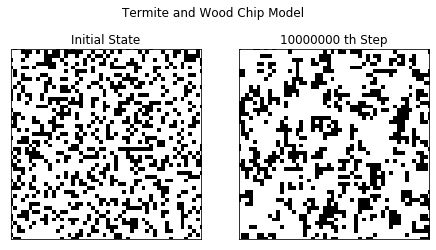

In [11]:
#hide_input
# Note: for large numbers of steps this can run slowly!

N_steps = 10_000_000

# Njit code:
# Termite and Wood Chip model

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from numba import njit
%matplotlib inline

# Define update step
@njit
def update(Grid, Mites, Hold, Drop):
    # Loop over all termites
    for m in range(N_m):
        # Select direction to move
        if np.random.random() > 0.5:
            # Move vertical
            if np.random.random() > 0.5:
                Mites[m,1] = (Mites[m,1] + 1) % N
            else:
                Mites[m,1] = (Mites[m,1] - 1) % N
        else:
            # Move horizontal
            if np.random.random() > 0.5:
                Mites[m,0] = (Mites[m,0] + 1) % N
            else:
                Mites[m,0] = (Mites[m,0] - 1) % N
        
        x = Mites[m,0]
        y = Mites[m,1]
        
        # If mite encounters chip and isn't holding
        # The pick up
        if (Grid[x,y] == 1) and (Hold[m] == 0):
            Grid[x,y] = 0
            Hold[m] = 1
        
        # If termite is holding and enconters chip
        # then note it is ready to drop chip
        if (Grid[x,y] == 1) and (Hold[m] == 1) and (Drop[m] == 0):
            Drop[m] = 1
        
        # If termite encounters empty grid cell and is ready to drop
        # ready to drop then drop chip
        if (Grid[x,y] == 0) and (Hold[m] == 1) and (Drop[m] == 1):
            Grid[x,y] = 1
            Hold[m] = 0
            Drop[m] = 0

for n in range(N_steps):
    update(Grid, Mites, Hold, Drop)

fig, axs = plt.subplots(1, 2, figsize=(7.5,4))
fig.suptitle('Termite and Wood Chip Model')
axs[0].set_title('Initial State')
axs[0].set_xticks([], [])
axs[0].set_yticks([], [])
axs[0].set_xlim(0, N-1)
axs[0].set_ylim(0, N-1)
axs[0].imshow(Initial_Grid, cmap='binary')
axs[1].set_title('%i th Step' %N_steps)
axs[1].set_xticks([], [])
axs[1].set_yticks([], [])
axs[1].set_xlim(0, N-1)
axs[1].set_ylim(0, N-1)
axs[1].imshow(Grid, cmap='binary')
plt.show()

If we left this run even longer we would be left with a single large pile (or a small number of large piles) of woodchips.

This is really quite a remarkable emergent behaviour. Each individual termite does not show anything we would term "intelligence" and there is no communication between the termites. Yet if we only observe chip piles our first instinct would be that they are a result of some sort of intelligent behaviour and/or cooperation or perhaps even some global oversight telling how each individual termite should behave. It seems almost unfathomable that this could be the result of only a few simple rules defining individual behaviour.

## Schelling Model
We now move onto another application of Cellular Automata through the Schelling model. As with the previous model there's an argument as to whether this is an agent-based model or a cellular automata. And as with the previous models the enviroment shall be a 2d square lattice (although this is not a requirement and it can be modified to essentially any geometry).

Schelling developed this model in the 1970s, reportedly on graph paper using coins to represent the agents - illustrating how simple automata based models can be. Thankfully now computation makes it easier to investigate the model.

Schelling's model aims to study how spatial segregation occurs. In our example each "cell" in the square lattice can be in one of three states: empty (denoted by $0$ or white), populated by agent of type A (denoted by $1$ or red) or populated by agent of type B (denoted by $-1$ or blue). There is a global "threshold" that represents how tolerant (or intolerant) the agents are, if the percentage of neighbours of the same type is above this threhold the agent is "satisfied" and the cell remains in the same state. If the percentage of neighbours is below this threshold the agent is "unsatisfied" - the cell will then become empty and some other (randomly selected) empty cell will become occupied by an agent of the same type (so the number of A, B and empty states remains constant over time). This is a simple model of agents "moving location" to satisfy some preference.

Since agents "look" for an empty cell it is difficult to implement a synchronous update scheme (e.g. if 2 agents are moving in the same step and select the same empty cell who gets it?) To avoid this we will randomly select an agent to move (cell to update) in each time step, this is fine for our purposes. We will also assume periodic (toroidal) boundary conditions so that each agent has the same number of neighbours and to avoid "edge effects".

Again this is remarkably simple as a model. We likely wouldn't believe this is capable of producing any "interesting" behaviour.

Let's code up an example:

In [19]:
# Schelling's Segregation Model

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

# Fix random seed
np.random.seed(123)

###### Model Parameters ######
N = 100                # Lattice size
pct_empty = 0.25       # Percentage of cells empty
A_B_ratio = 0.5        # Ratio of agents A:B
threshold = 0.4        # Threshold for satisfaction
N_step = 200           # Number of agent moves per frame to reduce animation size
num_frames = 150       # Number animation frames

###### Set up ######
# Set up lattice
cells = np.zeros((N,N))

# Set up lookup array for convenience
lookup = np.arange(N*N).reshape(N,N)

# Set initial conditions according to population proportions
for i in range(N):
    for j in range(N):
        if np.random.random() > pct_empty:
            if np.random.random() > A_B_ratio:
                cells[i,j] = 1
            else:
                cells[i,j] = -1
initial_cells = cells.copy()

# Define a single update step
def update():
    for step in range(N_step):
        # Non-zero cells nz
        nz = lookup[cells != 0]
        # zero cells z
        z = lookup[cells == 0]

        # Select random non-zero cell
        active = np.random.choice(nz)
        # Retrieve x and y coordinates
        active_x = active % N
        active_y = int((active - active_x) / N)

        # Current state
        state = cells[lookup == active][0]

        # Caclulate neighbour proportions n_prop
        n_same = 0
        for x in range(-1, 2):
            for y in range(-1, 2):
                xid = (active_x + x) % N
                yid = (active_y + y) % N

                if cells[xid, yid] == state:
                    n_same += 1 / 8
      
        # If n_prop is less than threshold select new empty state
        if n_same < threshold:
            cells[lookup == active] = 0
            new_cell = np.random.choice(z)
            cells[lookup == new_cell] = state

        
###### Animate ######
# Initialize figure
figure = plt.figure()
axes = plt.axes(xlim=(0, N-1), ylim=(0, N-1))
axes.set_xticks([], [])
axes.set_yticks([], [])
viz = plt.imshow(cells, cmap="bwr")

# Define animation step
def animate(frame):
    update()
    viz.set_array(cells)

# Display animation function
def display_animation(anim):
    # Close initialized static plot
    plt.close(anim._fig)
    
    # Returns animation to HTML
    return HTML(anim.to_jshtml())

# Set up FuncAnimation
anim = animation.FuncAnimation(figure, animate, frames=num_frames, interval=75)

# Call the display function
display_animation(anim)

To highlight the segregation we look at the initial (random) configuration and the configuration at the end of the animation:

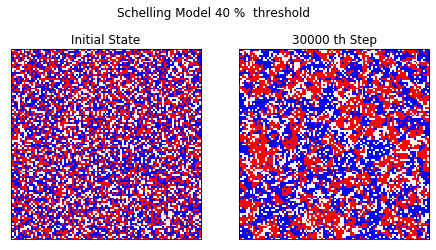

In [20]:
#hide_input

fig, axs = plt.subplots(1, 2, figsize=(7.5,4))
fig.suptitle('Schelling Model %i %%  threshold' %(threshold*100))
axs[0].set_title('Initial State')
axs[0].set_xticks([], [])
axs[0].set_yticks([], [])
axs[0].set_xlim(0, N-1)
axs[0].set_ylim(0, N-1)
axs[0].imshow(initial_cells, cmap="bwr")
axs[1].set_title('%i th Step' %(N_step*num_frames))
axs[1].set_xticks([], [])
axs[1].set_yticks([], [])
axs[1].set_xlim(0, N-1)
axs[1].set_ylim(0, N-1)
axs[1].imshow(cells, cmap="bwr")
plt.show()

We can see that even if the agents are fairly "tolerant" (they require only 40% of the surrounding cells to be the same type as them) the system eventually ends up with clusters of agents of the same type. This is quite a remarkable result that goes completely against common sense where one would expect low levels of tolerance (high threshold for satisfaction) to lead to segregation. In fact in the Schelling model very low levels of tolerance leads to **less** segregation - since the agents are rarely happy and continue to search never settling down.

To observe this let's look at what happens if we make the threshold $80\%$ - then agents are only happy when at least 7 out of 8 neighbours are of their type:

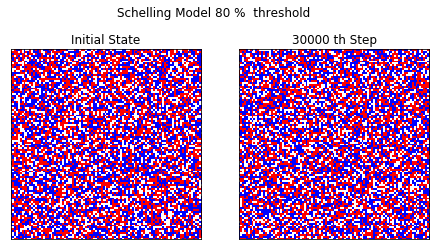

In [15]:
#hide_input

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

# Fix random seed
np.random.seed(123)

###### Model Parameters ######
N = 100                # Lattice size
pct_empty = 0.25       # Percentage of cells empty
A_B_ratio = 0.5        # Ratio of agents A:B
threshold = 0.8        # Threshold for satisfaction
N_step = 200           # Number of agent moves per frame to reduce animation size
num_frames = 150       # Number animation frames

###### Set up ######
# Set up lattice
cells = np.zeros((N,N))

# Set up lookup array for convenience
lookup = np.arange(N*N).reshape(N,N)

# Set initial conditions according to population proportions
for i in range(N):
    for j in range(N):
        if np.random.random() > pct_empty:
            if np.random.random() > A_B_ratio:
                cells[i,j] = 1
            else:
                cells[i,j] = -1
initial_cells = cells.copy()

for i in range(num_frames):
    update()

fig, axs = plt.subplots(1, 2, figsize=(7.5,4))
fig.suptitle('Schelling Model %i %%  threshold' %(threshold*100))
axs[0].set_title('Initial State')
axs[0].set_xticks([], [])
axs[0].set_yticks([], [])
axs[0].set_xlim(0, N-1)
axs[0].set_ylim(0, N-1)
axs[0].imshow(initial_cells, cmap="bwr")
axs[1].set_title('%i th Step' %(N_step*num_frames))
axs[1].set_xticks([], [])
axs[1].set_yticks([], [])
axs[1].set_xlim(0, N-1)
axs[1].set_ylim(0, N-1)
axs[1].imshow(cells, cmap="bwr")
plt.show()

We can see here the result of high levels of intolerance does not lead to segregation.

Now one could argue the real world application of this model and the assumptions it makes. However it does raise an interesting point regarding emergence: localised behaviour (of individuals) does not always translate to global behaviour (of the entire system). This is a big problem for the social sciences where they have traditionally opted for the reductionist method as used in the traditional (natural) sciences. Schelling's simple model shows that this is not always appropriate and the assumption that local and global behaviours are related in all cases is a fallacy. This is fairly troubling when the results from traditional social sciences influences governmental behaviour! Once you are aware of this disconnect you begin to notice this fallacy everywhere.

Despite its simplicity the Schelling model has been shown to produce segregation patterns that closely matches observed residential patterns in cities across the world.

Again if we wanted to it is relatively easy to think of extensions to this model. The obvious example being: what if we have multiple agent types? Another could be: what happens if we allow heterogeneous thresholds (i.e. each agent has their own threshold rather than all agents having the same)? As before adding noise is also an option. Or we could believe that with more exposure agents become more tolerant and so their tolerances change over time depending on exposure. Perhaps we want to allow "foresight" - so an agent evaluates the open cells and chooses the one according to their preference. In addition to that we could allow a "moving delay" so that by the time the agent moves the situation could be different to what they originally intended. It is interesting to consider if these extensions change the behaviour in meaningful ways.

## Conclusion
In this blog we started by looking at simple 1d 2-state cellular automata, we moved through to 2 spatial dimensions. We then took these ideas and applied them to create 3 models: Conway's game of life, Termite-Woodchip and Schelling's segregation model. Through each of these we noticed that from simple deterministic rules there can be sophisticated emergent behaviours. This has a profound impact on our understanding of nature. 

Some of these observations include:
* Simple deterministic rules can produce (seemingly) random behaviour - what does this say about the nature of "randomness" in our universe?
* Simple deterministic rules can produce chaotic results
* Some sets of rules exhibit computational irreducibility while others do not
* Simple rules (such as Conway's Game of Life) can be Turing complete and capable of universal computation
* Simple individual behaviour can give the illusion of sophistication and/or large scale cooperation/governance
* Observed large scale behaviour does not necessarily correlate with individual local behaviour and vice versa (in the words of PW Anderson: "More is different") - Schelling's model shows that are intuitions can be wrong
* Following on from the above scientific reductionism is not always appropriate and emergent behaviours may become the next "scientific enlightenment"
